(10000, 3072)


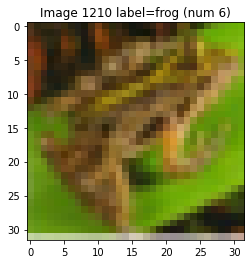

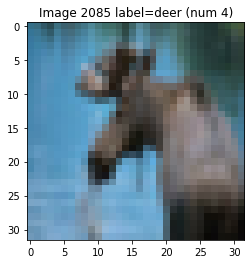

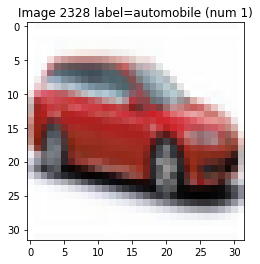

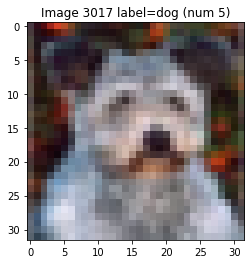

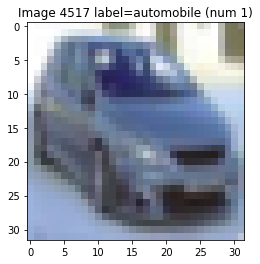

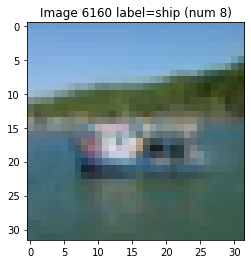

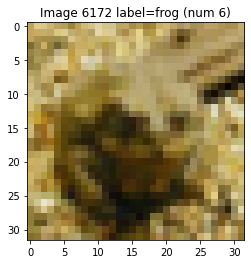

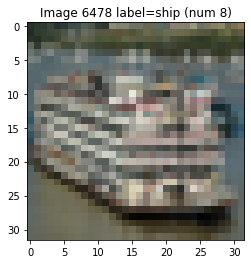

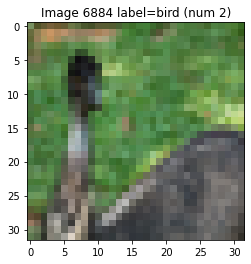

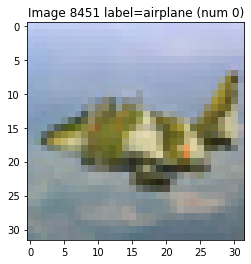

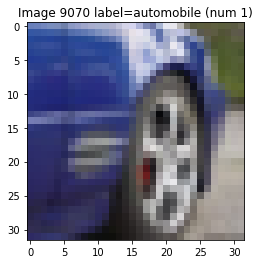

In [12]:
# Here is a code to load the data (CIFAR-10) from your hard drive.
# First load the CIFAR-data to some location in your computer. 
# Then, take this code and fix the path so that it finds the data from the right 
# location on your computer. Then the code goes through the data and it should
# randomly show some images from the data. Take a screenshot. 
# After that you can move into phases 2-4 of the assignment to write the 
# three functions. 

import pickle
import numpy as np
import matplotlib.pyplot as plt
from random import random

def unpickle(file):
    with open(file, 'rb') as f:
        dict = pickle.load(f, encoding="latin1")
    return dict

datadict = unpickle('cifar-10-batches-py/data_batch_1')
#datadict = unpickle('/home/kamarain/Data/cifar-10-batches-py/test_batch')

X = datadict["data"]
Y = datadict["labels"]

print(X.shape)

labeldict = unpickle('cifar-10-batches-py/batches.meta')
label_names = labeldict["label_names"]

X = X.reshape(10000, 3, 32, 32).transpose(0,2,3,1).astype("uint8")
Y = np.array(Y)

for i in range(X.shape[0]):
    # Show some images randomly
    if random() > 0.999:
        plt.figure(1);
        plt.clf()
        plt.imshow(X[i])
        plt.title(f"Image {i} label={label_names[Y[i]]} (num {Y[i]})")
        plt.pause(1)


In [ ]:
def class_acc(pred, gt):
    correct = 0
    for i in range(len(gt)):
        if gt[i] == pred[i]:
            correct += 1
    return correct / float(len(gt)) * 100.0

In [13]:
import random
def classifier_random(x):
    randomlist = []
    print(x)
    for i in range(x.shape[0]):
        n = random.randint(0, 9)
        randomlist.append(n)
    return np.array(randomlist)



In [14]:
def cifar10_classifier_1nn(x, trdata, trlabels):
    dist = np.zeros(len(trdata))
    for i in range(0, len(trdata)):
        dist[i] = np.sum(np.subtract(trdata[i], x) ** 2)
    test_label = trlabels[dist.argmin()]
    return test_label 

In [15]:
# datadict = unpickle('C:/Users/patir/OneDrive/Documentos/cifar-10-batches-py/data_batch_1')
Training_files = ["data_batch_1", "data_batch_2", "data_batch_3", "data_batch_4", "data_batch_5"]
data = []
labels = []
for i in range(5):
    raw_data = unpickle('cifar-10-batches-py/' + Training_files[i])
    data.append(raw_data["data"])
    labels.append(raw_data["labels"])
train_images = np.concatenate(data)
train_images = train_images.astype('int32')
train_classes = np.concatenate(labels)

labeldict = unpickle('cifar-10-batches-py/batches.meta')
label_names = labeldict["label_names"]

# Ejercicio 2
print(class_acc(train_classes, train_classes))

# Ejercicio 3
pred_rand = classifier_random(train_images)
print(pred_rand)
accuracy_result = class_acc(pred_rand, train_classes)
print(accuracy_result)

# Ejercicio 4
datadict = unpickle('cifar-10-batches-py/test_batch')
X = datadict["data"]
Y = datadict["labels"]
test_images = X
test_images = test_images.astype('int32')
test_classes = np.array(Y)
labeldict = unpickle('cifar-10-batches-py/batches.meta')
label_names = labeldict["label_names"]

x_label = []
for x in range(0, 10000):
    # test_labels[x] = cifar10_classier_1nn(test_images[x], train_images,train_classes)
    x_label.append(cifar10_classifier_1nn(test_images[x], train_images, train_classes))
    print(x_label)
print(class_acc(x_label, test_classes))


100.0
[[ 59  43  50 ... 140  84  72]
 [154 126 105 ... 139 142 144]
 [255 253 253 ...  83  83  84]
 ...
 [ 35  40  42 ...  77  66  50]
 [189 186 185 ... 169 171 171]
 [229 236 234 ... 173 162 161]]
[4 7 2 ... 4 3 9]
10.208
[4]
[4, 8]
[4, 8, 8]
[4, 8, 8, 0]
[4, 8, 8, 0, 4]
[4, 8, 8, 0, 4, 6]
[4, 8, 8, 0, 4, 6, 4]
[4, 8, 8, 0, 4, 6, 4, 2]
[4, 8, 8, 0, 4, 6, 4, 2, 4]
[4, 8, 8, 0, 4, 6, 4, 2, 4, 8]
[4, 8, 8, 0, 4, 6, 4, 2, 4, 8, 8]
[4, 8, 8, 0, 4, 6, 4, 2, 4, 8, 8, 8]
[4, 8, 8, 0, 4, 6, 4, 2, 4, 8, 8, 8, 5]
[4, 8, 8, 0, 4, 6, 4, 2, 4, 8, 8, 8, 5, 6]
[4, 8, 8, 0, 4, 6, 4, 2, 4, 8, 8, 8, 5, 6, 4]
[4, 8, 8, 0, 4, 6, 4, 2, 4, 8, 8, 8, 5, 6, 4, 4]
[4, 8, 8, 0, 4, 6, 4, 2, 4, 8, 8, 8, 5, 6, 4, 4, 3]
[4, 8, 8, 0, 4, 6, 4, 2, 4, 8, 8, 8, 5, 6, 4, 4, 3, 3]
[4, 8, 8, 0, 4, 6, 4, 2, 4, 8, 8, 8, 5, 6, 4, 4, 3, 3, 1]
[4, 8, 8, 0, 4, 6, 4, 2, 4, 8, 8, 8, 5, 6, 4, 4, 3, 3, 1, 6]
[4, 8, 8, 0, 4, 6, 4, 2, 4, 8, 8, 8, 5, 6, 4, 4, 3, 3, 1, 6, 8]
[4, 8, 8, 0, 4, 6, 4, 2, 4, 8, 8, 8, 5, 6, 4, 4, 3, 3, 1, 6, 8,

KeyboardInterrupt: 